<div>
<img src="logo.png" width="200"/>
</div>

# Algoritmo de Calculo de Probabilidad de que clientes bancarios realizen depositos a plazo

#### Integrantes del proyecto: Juan Isasi - Jose Vargas - Juan Cassinerio

## Introduccion

***Contexto empresarial***
Dentro de los productos y servicios que ofrecen los bancos, los depositos a plazo representan un gran porcentaje de las fuentes de ingresos. Para poder maximizar la cantidad de depositos a plazo realizados, se buscara identificar a los clientes (parametros) que tengan la mayor probabilidad de subscribirse a este tipo de producto y de esa manera poder mejorar los esfuerzos de marketing en dichos clientes.

***Problema empresarial***:
Se recopilo un conjuntos de datos con el objetivo de desarrollar modelos de predicción para clasificar la probabilidad de que clientes realizen depositos a plazo en bancos. Estos datos fueron tomados de un una campaa de marketing de una importante institucion bancaria de Portugal.

***Contexto analitico***:
Se nos permitio el acceso a un .cvs donde emplearemos un analisis descritivo para poder entender de mejor forma los datos recopilados y su relacion con la variable a investigar "y" (Si el deposito a plazo fue realizado o no).

***Preguntas a responder a partir del conocimiento de los datos***

- 1) Relacion entre estado civildel cliente y Prababiliadad de realizar depositos a plazo
- 2) Meses en que los clientes son mas predispuetsos a realizar depositos a plazo
- 3) Relacion entre edad del cliente y duracion del ultimo contacto con el mismo con la Probabilidad que este efectue un deposito a plazo
- 4) Grupos de clientes en funcion de rango etario y la duracion de las llamadas con los mismos

Descarga del DataSets

https://www.kaggle.com/datasets/rashmiranu/banking-dataset-classification

## Variables:

Este analisis servira para verificar si una persona sera propensa a realizar un depósito a plazo. La variable **output** a predecir es **y** donde 1: se subscribio 0: no se subscribio. Para ello se cuenta con las siguientes variables **input** :

<table >
<thead>
  <tr>
    <th>#</th>
    <th>Variable</th>
    <th>Concepto</th>
  </tr>
</thead>
<tbody>
    <tr>
        <th>1</th>
        <td>age</td>
        <td>edad del cliente</td>
    </tr>
    <tr>
        <th>2</th>
        <td>job</td>
        <td>profesion ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital: estado civil </td>    
    </tr>
    <tr>
        <th>3</th>
        <td>marital</td>
        <td>estado civil </td>    
    </tr>
    <tr>
        <th>4</th>
        <td>education</td>
        <td>formacion academica ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')</td>      
    </tr>
    <tr>
        <th>5</th>
        <td>default</td>
        <td>si posee credito defaulteado ('no','yes','unknown')</td>   
    </tr>
    <tr>
        <th>6</th>
      <td>housing</td>
      <td>si posee credito inmobiliario ('no','yes','unknown')</td>  
    </tr>
    <tr>
        <th>7</th>
      <td>loan</td>
      <td>si posee un credito personal ('no','yes','unknown')</td> 
    </tr>
    <tr>
        <th>8</th>
      <td>contact</td>
      <td>metodo de contacto ('cellular','telephone')</td>   
    </tr>
    <tr>
        <th>9</th>
      <td>month</td>
      <td>ultimo mes de contacto realizado al cliente durante la campaña de marketing ('jan', 'feb', 'mar', …, 'nov', 'dec')</td>   
    </tr>
    <tr>
        <th>10</th>
      <td>day_of_week</td>
      <td>ultimo contacto de la semana ('mon','tue','wed','thu','fri')</td>   
    </tr>
    <tr>
        <th>11</th>
      <td>duration</td>
      <td>duracion del ultimo contacto en dicha llamada, en segundos</td> 
    </tr>
    <tr>
        <th>12</th>
      <td>campaign</td>
      <td>numero de contactos realizados durante esta ultima campaña</td>    
    </tr>
    <tr>
        <th>13</th>
      <td>pdays</td>
      <td>numero de dias que pasaron desde la ultima vez que fue contactado (999 means client was not previously contacted)</td>
        <td></td>
    </tr>
    <tr>
        <th>14</th>
      <td>previous</td>
      <td>numero de contactos realizados a este cliente antes de la presente campaña</td> 
    </tr>
    <tr>
        <th>15</th>
      <td>poutcome</td>
      <td>resultado de la campaña ('failure','nonexistent','success')</td>  
    </tr>    
</tbody>
</table>

In [26]:
#Seleccion / llamada del Datasets
import pandas as pd
df = pd.read_csv('new_train.csv', sep= ',')
#Vista previa del Datasets
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [27]:
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

### 1) Relacion entre estado civil del cliente y Prababiliadad de realizar depositos a plazo

<AxesSubplot:title={'center':'Estado Civil vs. Clientes con Plazos Fijos'}, xlabel='Estado Civil', ylabel='Plazos Fijos %'>

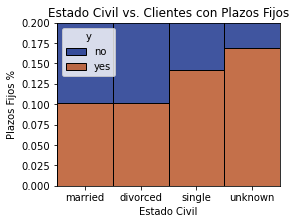

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

df.groupby("marital").sum()
plt.figure(figsize=(4,3))
plt.title("Estado Civil vs. Clientes con Plazos Fijos")
plt.xlabel('Estado Civil')
plt.ylabel('Plazos Fijos %')
plt.ylim(0,0.2)
sns.histplot(data=df,x='marital',hue='y',palette = "dark",multiple="fill") 

Se observa que predominan los depostios a plazo en clientes Solteros con un 15%, mientras que las personas casadas muestran un 10%, un 33% menor. Igualmente cabe resaltar que se desconoce el estado civil del 17% de las muestras.

### 2) Meses en que los clientes son mas predispuetsos a realizar depositos a plazo

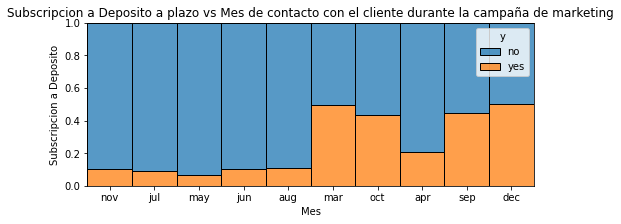

In [16]:
plt.figure(figsize=(8,3))
plt.title("Subscripcion a Deposito a plazo vs Mes de contacto con el cliente durante la campaña de marketing")
plt.xlabel('Mes')
plt.ylabel('Subscripcion a Deposito')
sns.histplot(data=df,x="month", hue="y",multiple="fill",discrete=True, shrink=1)
plt.show()

Podemos observar que los meses de Marzo, Octubre, Septiembre y Diciembre tuvieron un ratio sobresaliente de Subscripciones a Depositos a Plazo, un 200% mayor en promedio que el resto de meses.

### 3) Relacion entre edad del cliente y duracion del ultimo contacto con el mismo con la Probabilidad que este efectue un deposito a plazo

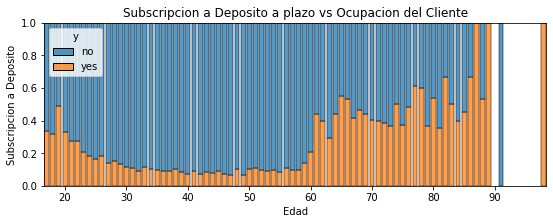

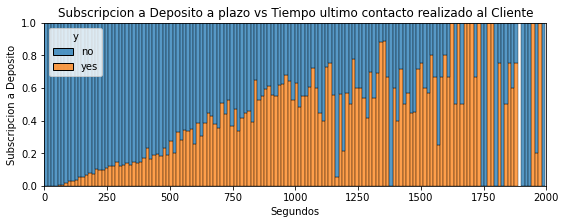

In [17]:
plt.figure(figsize=(9,3))
plt.title("Subscripcion a Deposito a plazo vs Ocupacion del Cliente")
plt.xlabel('Edad')
plt.ylabel('Subscripcion a Deposito')
sns.histplot(data=df,x="age", hue="y",multiple="fill",discrete=True, shrink=.8)
plt.show()

plt.figure(figsize=(9,3))
plt.title("Subscripcion a Deposito a plazo vs Tiempo ultimo contacto realizado al Cliente")
plt.xlabel('Segundos')
plt.ylabel('Subscripcion a Deposito')
plt.xlim(0,2000)
sns.histplot(data=df,x='duration',hue='y',multiple="fill")
plt.show()

De la primera grafica podemos observar que los clientes con edad menor a 25 años y mayor a 60 años son mas proclives a realizar depositos a plazo.
catnom = ['jobtitle', 'department']

data = pd.get_dummies(data, columns = catnom, drop_first= True)
data.head()
De la segunda grafica Las llamadas a clientes con duracion menor a 100 segundos no concretaron con realizar depositos Las llamadas con duracion entre 760 segundos (12min) o mas tuvieron mas de un 50% de concretar en depositos. Parece haber una correlacion directa entre el ratio de subscripcion y la duracion de la llamada con el cliente.

In [53]:
dummy_month = pd.get_dummies(df["month"], prefix="month")
dummy_marital = pd.get_dummies(df["marital"], prefix="marital")

df1 = df.drop(['job','education','default','housing','loan','contact','day_of_week','campaign','pdays','previous','poutcome'], axis=1)

df2 = df1.drop(["month"], axis=1)
df3 = df2.drop(["marital"], axis=1)

df3 = pd.concat([df3, dummy_month, dummy_marital], axis=1)
df3.head()

KeyError: 'month'

In [ ]:
df3 = df3[['age','duration',"month","marital"]]
df3.head()

In [ ]:
X = df3.iloc[:, :10]
y = df3.iloc[:, -1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, 
                                                    random_state=1)

from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)
y_pred = algoritmo.predict(X_test)
y_pred

In [54]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

df["y"] = df["y"].replace("yes",1)
df["y"] = df["y"].replace("no",0)
X = df[['age','duration']]
y = df.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

logr = LogisticRegression()
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)
print('score =',accuracy_score(y_test, y_pred))
print('CR', classification_report(y_test, y_pred))




score = 0.8922610015174507
CR               precision    recall  f1-score   support

           0       0.90      0.99      0.94      5835
           1       0.61      0.17      0.27       755

    accuracy                           0.89      6590
   macro avg       0.75      0.58      0.60      6590
weighted avg       0.87      0.89      0.86      6590



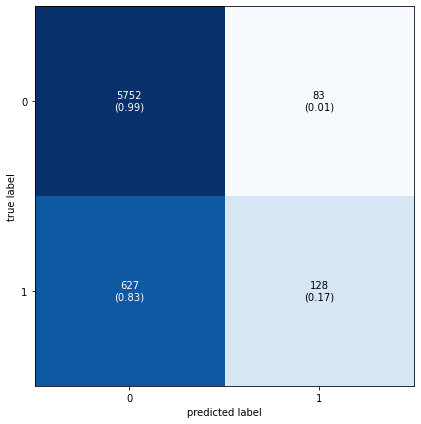

In [55]:
matriz = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=True)
plt.tight_layout();

Utilizando los datos de duracion de llamada y edad del cliente realizamos un algoritmo de prediccion, obteniendo un score de 89% utilizando un regresion logistica.

De la matriz de confusion podemos observar la presicion del este preeliminar modelo, observando los valores de falso y verdaderos negativos/positivos correspondientementes.

# Con las variables que mejor aproximan nuestro modelo que son: "Age", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "Geography_France"; "Geography_Spain" nuestra variable target "Exited" puede identificar 2220 verdaderos positivos y 46 verdaderos negativos. Además, nuestro modelo con sus mejores variables cuenta con 159 falsos negativos y 575 falsos positivos.